# Panda au service du projet M&M's

In [283]:
import pandas 
données = pandas.read_csv("donnees_compte_mms.csv", sep=",")


Mise en forme des données pour exploitation

In [284]:
données.drop('Unnamed: 9', axis=1, inplace=True)

In [285]:
données = données.rename(columns={"nom de l'image ": "Numéro","total lignes :":"M&Ms par paquet",'date ':'date'})

Affichage des données originales 

In [286]:
données

,nom,date,jaune,rouge,bleu,vert,marron,orange,total
0,1342,7/10/21,3,5,4,1,3,3,19
1,1344,8/10/21,6,2,3,2,1,6,20
2,1345,9/10/21,5,1,4,2,3,5,20
3,1350,10/10/21,7,1,1,2,3,7,21
4,1351,11/10/21,6,2,4,1,1,5,19
...,...,...,...,...,...,...,...,...,...
226,1332,21/5/22,4,2,3,6,3,1,19
227,1335,22/5/22,1,5,4,3,3,3,19
228,1339,23/5/22,1,5,2,4,1,3,16
229,165,24/5/22,3,4,3,1,4,4,19


Changement du format des données de la colonne de date, détectée par défaut comme une chaîne de caractère, changée au format datetime object dans le but d'obtenir un ordre chronologique

In [287]:
données['date'] = pandas.to_datetime(données['date'], dayfirst=True, format='mixed')

Rangement par ordre chronologique

In [288]:
données.sort_values(by = 'date')

,nom,date,jaune,rouge,bleu,vert,marron,orange,total
0,1342,2021-10-07,3,5,4,1,3,3,19
1,1344,2021-10-08,6,2,3,2,1,6,20
2,1345,2021-10-09,5,1,4,2,3,5,20
3,1350,2021-10-10,7,1,1,2,3,7,21
4,1351,2021-10-11,6,2,4,1,1,5,19
...,...,...,...,...,...,...,...,...,...
226,1332,2022-05-21,4,2,3,6,3,1,19
227,1335,2022-05-22,1,5,4,3,3,3,19
228,1339,2022-05-23,1,5,2,4,1,3,16
229,165,2022-05-24,3,4,3,1,4,4,19


# Traitement des données par couleur

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
current_palette = sns.color_palette('colorblind')

M&M's jaunes par paquet

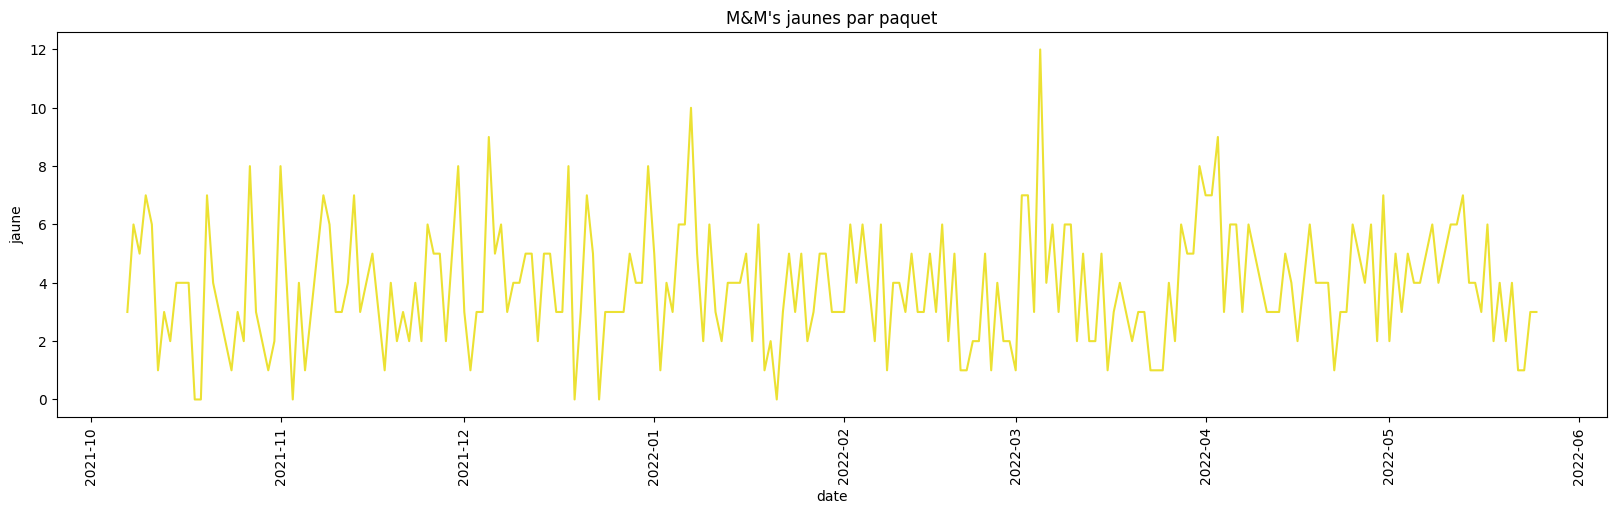

In [290]:
data = données

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot(x=data['date'], 
                    y=data['jaune'],
                    color= current_palette[8],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's jaunes par paquet")
ax.set_xlabel('date')

plt.show()

M&M's vert par paquets

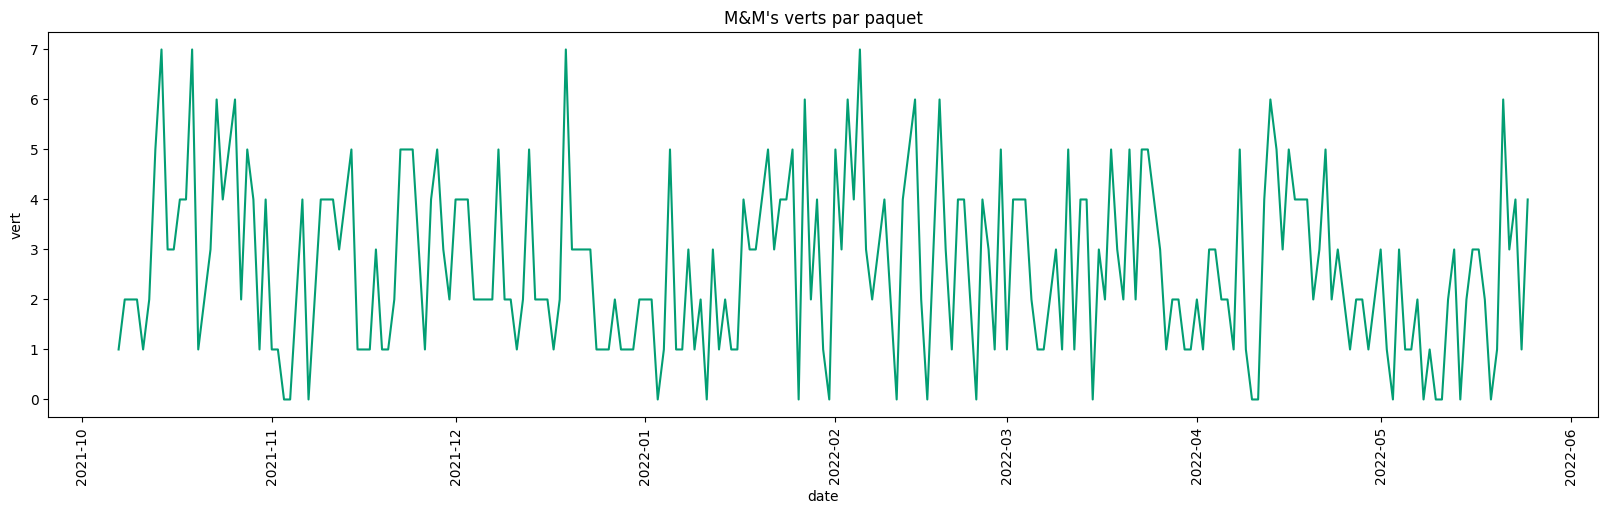

In [291]:
data = données

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot(x=data['date'], 
                    y=data['vert'],
                    color= current_palette[2],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's verts par paquet")
ax.set_xlabel('date')

plt.show()

M&M's rouges par paquet

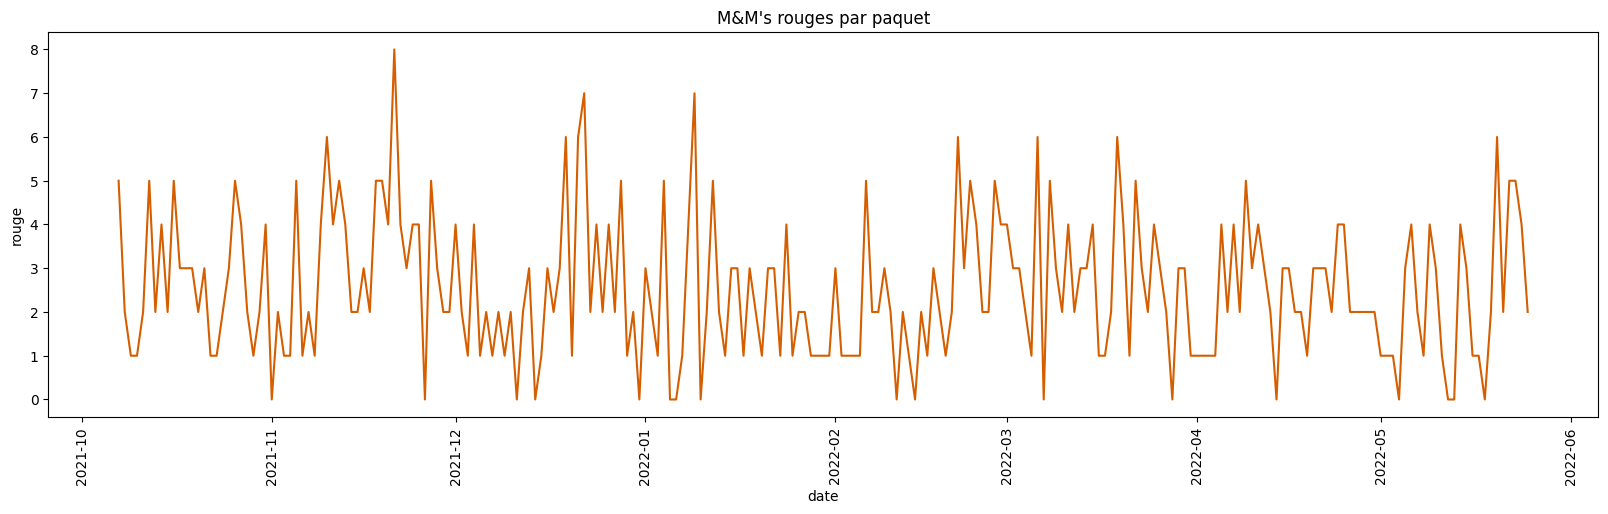

In [292]:
data = données

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot(x=data['date'], 
                    y=data['rouge'],
                    color= current_palette[3],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's rouges par paquet")
ax.set_xlabel('date')

plt.show()

M&M's oranges par paquet

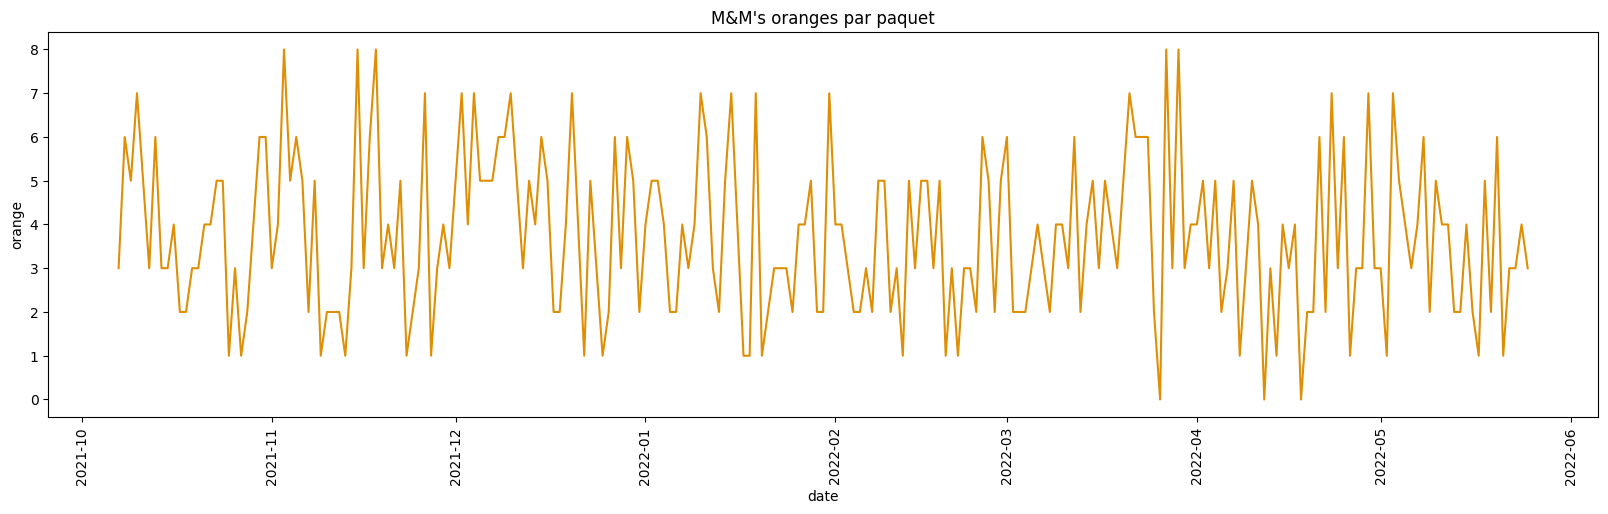

In [293]:
data = données

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot(x=data['date'], 
                    y=data['orange'],
                    color= current_palette[1],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's oranges par paquet")
ax.set_xlabel('date')

plt.show()

M&M's bleus par paquet 

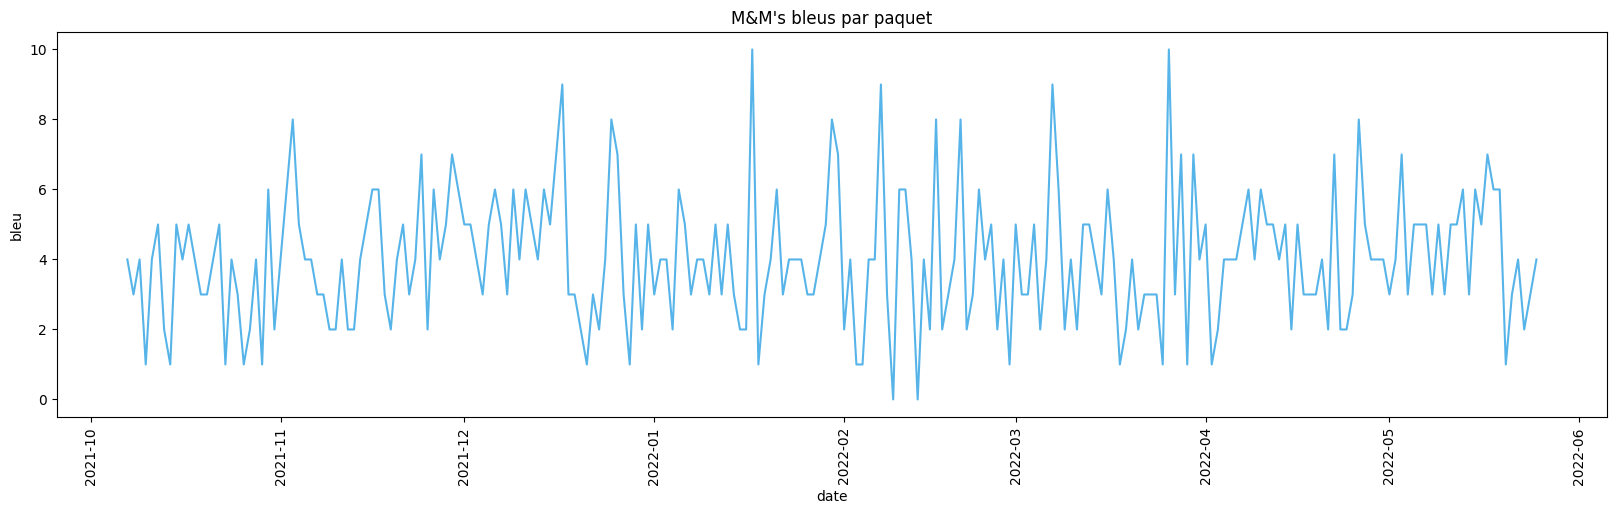

In [294]:
data = données

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot(x=data['date'], 
                    y=data['bleu'],
                    color= current_palette[9],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's bleus par paquet")
ax.set_xlabel('date')

plt.show()

M&M's marrons par paquet

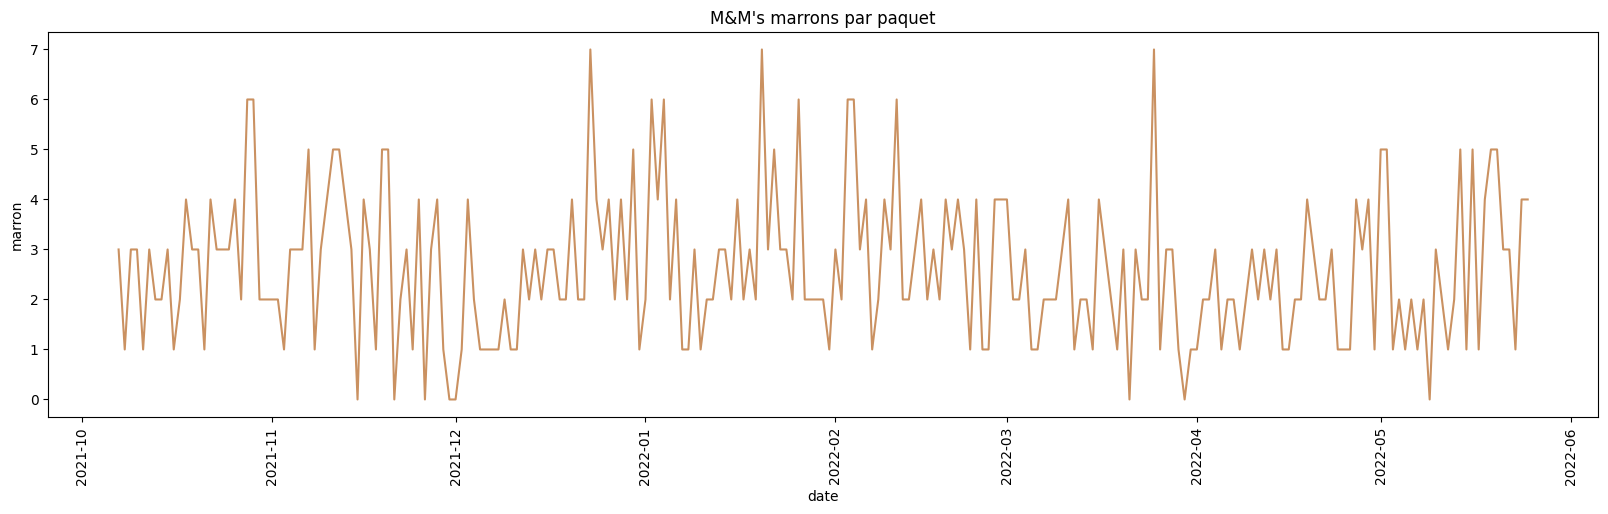

In [295]:
data = données

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot(x=data['date'], 
                    y=data['marron'],
                    color= current_palette[5],
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's marrons par paquet")
ax.set_xlabel('date')

plt.show()

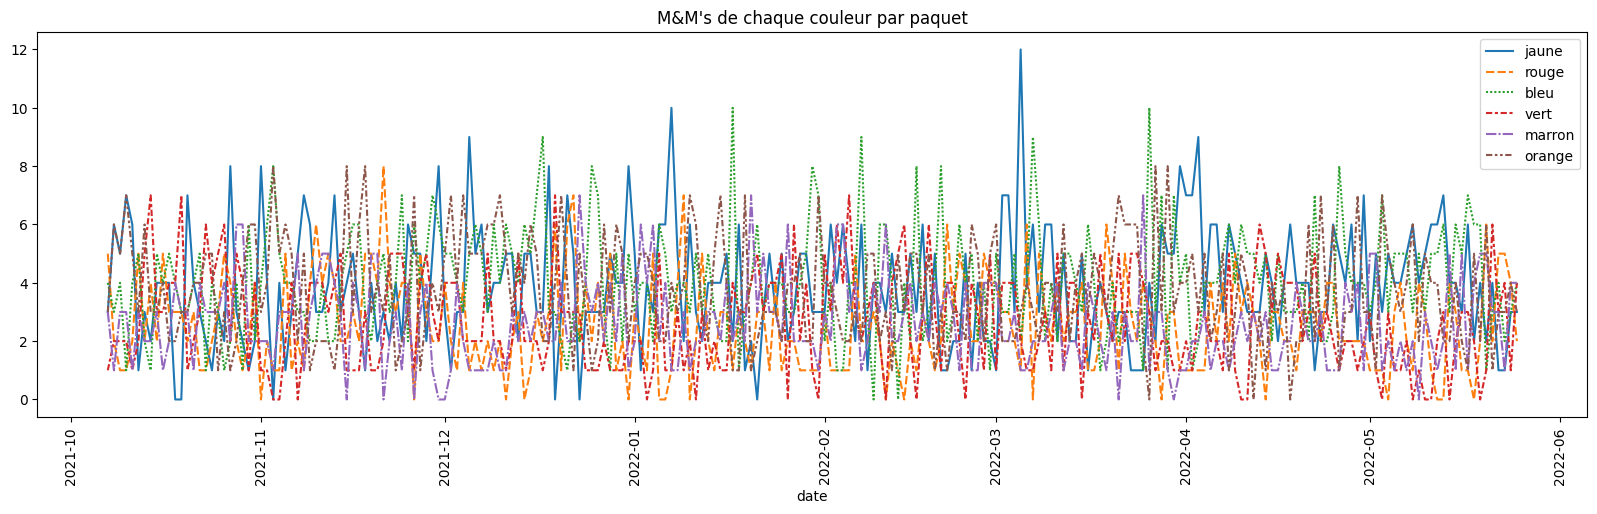

In [296]:
data = données.drop("nom", axis=1).drop("total", axis=1).drop("date", axis=1)
data.index = données["date"]

fig, ax = plt.subplots(figsize=(20, 5)) 
chart = sns.lineplot( data=data,
                    ax=ax)

plt.xticks(rotation=90)
ax.set_title("M&M's de chaque couleur par paquet")
ax.set_xlabel('date')

plt.show()

## Réalisation d'un tableau croisé pour déterminer si les couleurs sont indépendantes

In [297]:
pandas.crosstab(index=données['jaune'], columns=données['vert'])

vert,0,1,2,3,4,5,6,7
jaune,,,,,,,,
0,1,0,0,1,1,1,0,2
1,0,3,3,5,6,3,0,0
2,1,6,3,3,7,7,3,1
3,6,10,8,7,9,8,3,0
4,5,11,8,7,4,2,2,1
5,4,10,10,5,4,2,0,0
6,2,4,10,6,3,2,0,0
7,0,2,4,2,3,0,0,0
8,0,2,4,0,0,0,0,0


### Regroupement des paquets selon leur nombre de M&M's

In [298]:
données.groupby(['total']).size()

total
16     5
17    12
18    43
19    58
20    60
21    38
22    12
23     3
dtype: int64

### Création de la courbe correspondante

<AxesSubplot: xlabel="nombre de M&M's par paquet", ylabel='nombre de paquets concernés'>

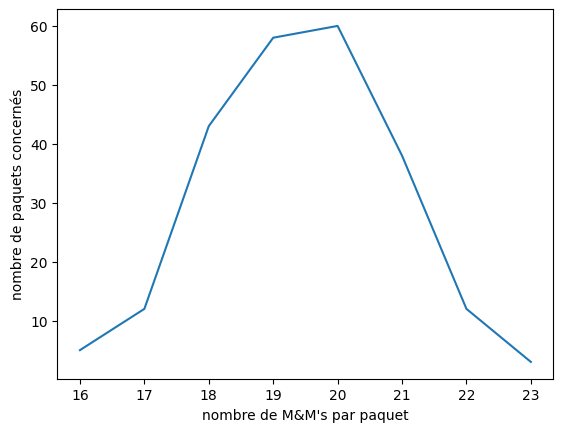

In [299]:
données.groupby(['total']).size().plot(xlabel = "nombre de M&M's par paquet", ylabel = 'nombre de paquets concernés')

## Proportions de M&M's par couleur par paquet

In [300]:
données['jaune'].sum()

897

In [301]:
données['marron'].sum()

603

In [302]:
données['rouge'].sum()

585

In [303]:
données['orange'].sum()

865

In [304]:
données['bleu'].sum()

928

In [305]:
données['vert'].sum()

613

Création d'une nouvelle Dataframe avec les proportions 

In [306]:
proportions = pandas.DataFrame({'jaune': [données['jaune'].sum()],'vert': [données['vert'].sum()], 'marron': [données['marron'].sum()], 'bleu': [données['bleu'].sum()], 'orange': [données['orange'].sum()], 'rouge': [données['rouge'].sum()], 'total':[données['total'].sum()]})

In [307]:
proportions

,jaune,vert,marron,bleu,orange,rouge,total
0,897,613,603,928,865,585,4491


In [308]:
proportions_bis = pandas.DataFrame({'couleurs':['jaune', 'vert', 'marron','bleu','orange','rouge', 'total'], 'proportions':[données['jaune'].sum(),données['vert'].sum(), données['marron'].sum(),données['bleu'].sum(), données['orange'].sum(),données['rouge'].sum(), données['total'].sum()]})

In [309]:
proportions_bis

,couleurs,proportions
0,jaune,897
1,vert,613
2,marron,603
3,bleu,928
4,orange,865
5,rouge,585
6,total,4491


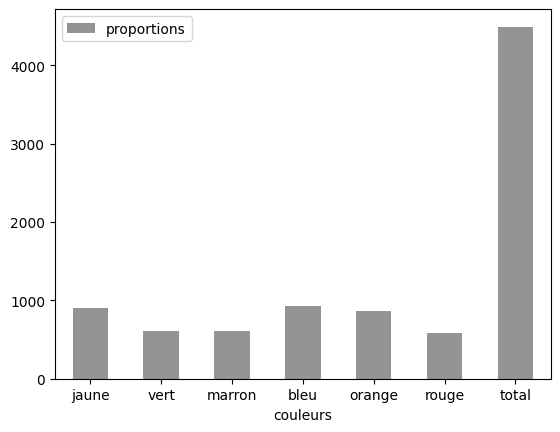

In [310]:
ax = proportions_bis.plot.bar(x='couleurs', y='proportions', rot=0, color = current_palette[7])


### Test khi 2 de parité

division entière de chaque valeur par 2 et addition des résultats (attendus 0 ou 1) et en fonction de l'effectif à déduire la proportion de valeurs paires et impaires en khi 2 

In [311]:
données['even_odd_jaune'] = données.jaune % 2

In [312]:
données['even_odd_jaune'].sum()

119

Donc 119 paquets aux M&M's jaunes en nombre impair

In [313]:
données['even_odd_bleu'] = données.bleu % 2

In [314]:
données['even_odd_bleu'].sum()

112

Donc 112 paquets aux M&M's bleus en nombre impair

In [315]:
données['even_odd_orange'] = données.orange % 2

In [316]:
données['even_odd_orange'].sum()

125

Donc 125 paquets aux M&M's oranges en nombre impair

In [317]:
données['even_odd_rouge'] = données.rouge % 2

In [318]:
données['even_odd_rouge'].sum()

113

Donc 113 paquets aux M&M's rouges en nombre impair

In [319]:
données['even_odd_marron'] = données.marron % 2

In [320]:
données['even_odd_marron'].sum()

119

Donc 119 paquets aux M&M's marrons en nombre impair

In [321]:
données['even_odd_vert'] = données.vert % 2

In [322]:
données['even_odd_vert'].sum()

115

Donc 115 paquets aux M&M's verts en nombre impair

In [323]:
données


,nom,date,jaune,rouge,bleu,vert,marron,orange,total,even_odd_jaune,even_odd_bleu,even_odd_orange,even_odd_rouge,even_odd_marron,even_odd_vert
0,1342,2021-10-07,3,5,4,1,3,3,19,1,0,1,1,1,1
1,1344,2021-10-08,6,2,3,2,1,6,20,0,1,0,0,1,0
2,1345,2021-10-09,5,1,4,2,3,5,20,1,0,1,1,1,0
3,1350,2021-10-10,7,1,1,2,3,7,21,1,1,1,1,1,0
4,1351,2021-10-11,6,2,4,1,1,5,19,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,1332,2022-05-21,4,2,3,6,3,1,19,0,1,1,0,1,0
227,1335,2022-05-22,1,5,4,3,3,3,19,1,0,1,1,1,1
228,1339,2022-05-23,1,5,2,4,1,3,16,1,0,1,1,1,0
229,165,2022-05-24,3,4,3,1,4,4,19,1,1,0,0,0,1
